<a href="https://colab.research.google.com/github/anushajain16062004/Travel_Recommendation_System/blob/main/travelRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Travel recommendation System**

A machine learning algorithm known as a recommendation system combines information about users and products to forecast a user's potential interests. These systems are used in a wide range of applications, such as e-commerce, social media, and entertainment, to provide personalized recommendations to users.

There are several types of recommendation systems, including:

**Content-based filtering**: This type of system uses the characteristics of items that a user has liked in the past to recommend similar items.

**Collaborative filtering:** This type of system uses the past behaviour of users to recommend items that similar users have liked.

**Hybrid:** To generate suggestions, this kind of system combines content-based filtering and collaborative filtering techniques.

**Matrix Factorization:** Using this method, the user-item matrix is divided into two lower-dimension matrices that are then utilized to generate predictions.

**Deep Learning:** To train the user and item representations that are subsequently utilized to generate recommendations, these models make use of neural networks.

The choice of which type of recommendation system to use depends on the specific application and the type of data available.

It's worth noting that recommendation systems are widely used and can have a significant impact on businesses and users. However, it's important to consider ethical considerations and biases that may be introduced to the system.




##STEP 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

##Load Datasets

In [ ]:
destinations_df = pd.read_csv('Expanded_Destinations.csv')
reviews_df= pd.read_csv('Final_Updated_Expanded_Reviews.csv')
userhistory_df = pd.read_csv('Final_Updated_Expanded_UserHistory.csv')
users_df= pd.read_csv('Final_Updated_Expanded_Users.csv')

##Running datasets


In [ ]:
destinations_df.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [ ]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [ ]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [ ]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


##STEP 2: DATA PREPROCESSING
Merging data



In [ ]:
reviews_destinations=pd.merge(reviews_df,destinations_df,on='DestinationID',how='inner')

reviews_destination_userhistory=pd.merge(reviews_destinations,userhistory_df,on='UserID',how='inner')

df= pd.merge(reviews_destination_userhistory,users_df,on='UserID',how='inner')

df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [ ]:
df.shape

(993, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
ReviewID,0
DestinationID_x,0
UserID,0
Rating,0
ReviewText,0
Name_x,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0


##2.1 Visualization


<ipython-input-15-b6640e000f82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity',y='Name', data=destinations_df.sort_values(by='Popularity',ascending=False),palette='viridis')


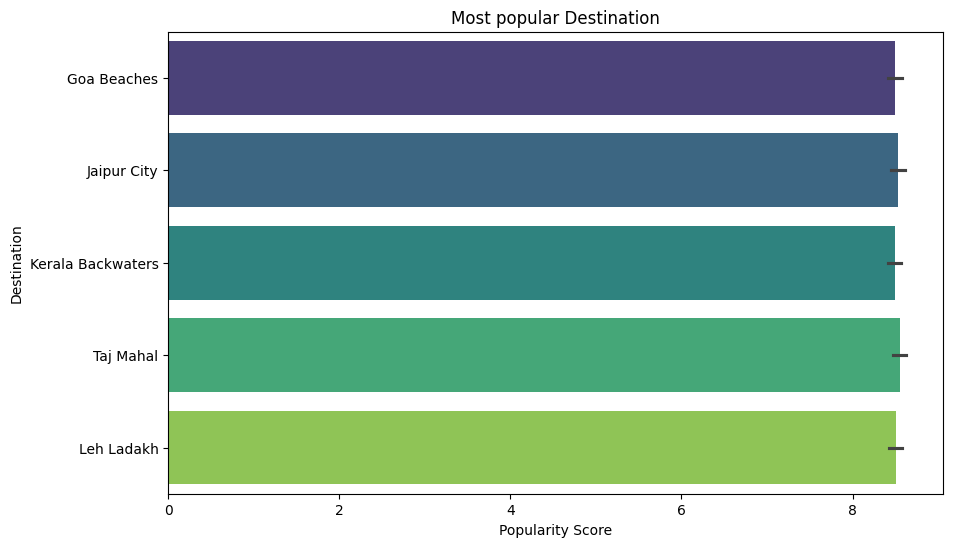

In [ ]:
#1.Destination popularity
plt.figure(figsize=(10,6))
sns.barplot(x='Popularity',y='Name', data=destinations_df.sort_values(by='Popularity',ascending=False),palette='viridis')
plt.title("Most popular Destination")
plt.xlabel("Popularity Score")
plt.ylabel("Destination")
plt.show()

<ipython-input-16-5109e7f62ec9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type', data=destinations_df, order=destinations_df['Type'].value_counts().index, palette='coolwarm')


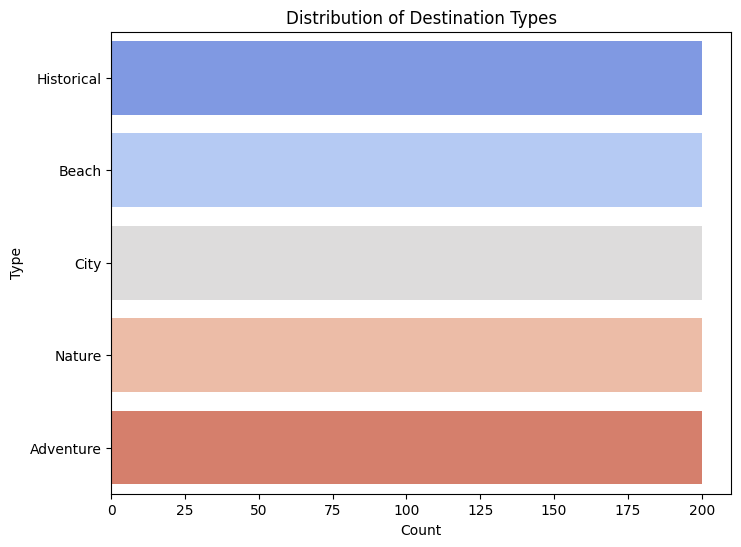

In [ ]:
#2.Destination types distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='Type', data=destinations_df, order=destinations_df['Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Destination Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

<ipython-input-17-2e7088160a8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='mako')


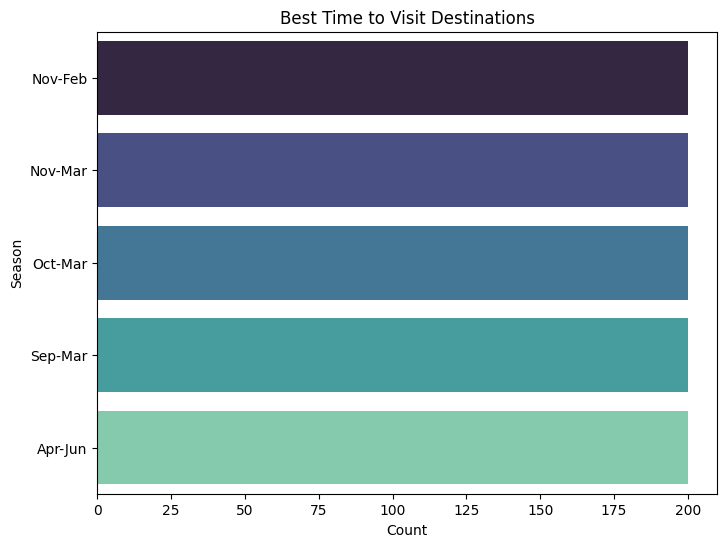

In [ ]:
# 3. Best Time to Visit Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='mako')
plt.title('Best Time to Visit Destinations')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()


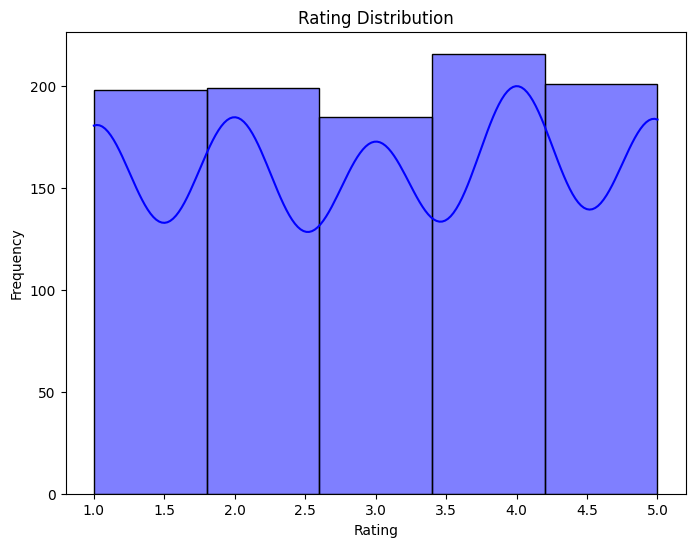

In [ ]:
# 4. Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##CONTENT BASED RECOMMENDATION

In [ ]:
df['Features']=df['Type']+" "+ df['State']+" "+df['BestTimeToVisit']+" "+df['Preferences']
vectorizer=TfidfVectorizer(stop_words='english')
destination_features=vectorizer.fit_transform(df['Features'])
cosine_sim=cosine_similarity(destination_features,destination_features)

In [ ]:
cosine_sim

array([[1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ],
       [0.30209204, 1.        , 0.10568682, ..., 0.89329488, 0.89329488,
        0.30209204],
       [0.80314548, 0.10568682, 1.        , ..., 0.        , 0.        ,
        0.80314548],
       ...,
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [0.10628488, 0.89329488, 0.        , ..., 1.        , 1.        ,
        0.10628488],
       [1.        , 0.30209204, 0.80314548, ..., 0.10628488, 0.10628488,
        1.        ]])

##Recommendation function

In [ ]:
# Define recommendation function
def recommend_destinations(user_id, userhistory_df, destinations_df, cosine_sim):
    """
    Recommends top 5 destinations for a given user based on similarity scores.
    Args:
    - user_id: ID of the user.
    - userhistory_df: User history DataFrame containing 'UserID' and 'DestinationID'.
    - destinations_df: Destinations DataFrame containing destination details.
    - cosine_sim: Cosine similarity matrix for destinations.
    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Get the destinations the user has visited
    visited_destinations = userhistory_df[userhistory_df['UserID'] == user_id]['DestinationID'].values

    # Calculate similarity scores for visited destinations
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)

    # Recommend the top 5 destinations the user hasn't visited yet
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]

    recommendations = []
    for idx in recommended_destinations_idx:
        if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
            # Append detailed information for each recommendation
            recommendations.append(destinations_df.iloc[idx][[
                'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
            ]].to_dict())
        if len(recommendations) >= 5:
            break

    # Convert recommendations to a DataFrame
    return pd.DataFrame(recommendations)
# Example: Recommend destinations for user with ID 1
recommended_destinations = recommend_destinations(2, userhistory_df, destinations_df, cosine_sim)
# Display recommendations
recommended_destinations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,143,Jaipur City,Rajasthan,City,8.299736,Oct-Mar
1,892,Goa Beaches,Goa,Beach,8.864328,Nov-Mar
2,382,Goa Beaches,Goa,Beach,8.487141,Nov-Mar
3,306,Taj Mahal,Uttar Pradesh,Historical,8.448064,Nov-Feb
4,722,Goa Beaches,Goa,Beach,9.389780,Nov-Mar


##COLLABORATIVE FILTERING
In collaborative filtering, we recommend destinations based on the behavior and preferences of other similar users.
1.Input data

2.Similarity calculation

3.Prediction-missing values

4.Recommendation


Advantages of Collaborative Filtering

Works without content data, relying only on user behavior.
Captures complex, subjective preferences.
Provides diverse and novel recommendations.
Adapts dynamically to new user interactions.
Scales well with large datasets.



Disadvantages of Collaborative Filtering

Struggles with new users/items (cold start problem).
Sparse data can hinder performance.
Computationally expensive for large datasets.
Biased towards popular items (popularity bias).
May limit diversity (filter bubble).
Requires significant interaction data.
Vulnerable to manipulation (shilling attacks).


In [ ]:
# Create a user-item matrix based on user history
user_item_matrix = userhistory_df.pivot(index='UserID', columns='DestinationID', values='ExperienceRating')

# Fill missing values with 0 (indicating no rating/experience)
user_item_matrix.fillna(0, inplace=True)

user_similarity=cosine_similarity(user_item_matrix)


In [ ]:
# Function to recommend destinations based on user similarity
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destinations_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Find similar users
    similar_users = user_similarity[user_id - 1]

    # Get the top 5 most similar users
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]

    # Get the destinations liked by similar users
    similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)

    # Recommend the top 5 destinations
    recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index

    # Filter the destinations DataFrame to include detailed information
    recommendations = destinations_df[destinations_df['DestinationID'].isin(recommended_destinations_ids)][[
        'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
    ]]

    return recommendations

# Example: Collaborative recommendations for user 1
collaborative_recommendations = collaborative_recommend(1, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
335,336,Taj Mahal,Uttar Pradesh,Historical,9.268792,Nov-Feb
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun
878,879,Kerala Backwaters,Kerala,Nature,8.309631,Sep-Mar


##USER INPUT FEATURE BASE RECOMENDATION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using regressor for continuous target
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using regressor for continuous target
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the data
data = pd.read_csv('final_df.csv')
# Select relevant features
features = ['Name_x', 'State', 'Type', 'BestTimeToVisit', 'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren']
target = 'Popularity'  # Predicting popularity

# Encode categorical variables
label_encoders = {}
for col in features:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Split the dataset
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 0.30
R² Score: 0.07


In [ ]:
import pandas as pd

# Prediction system
def recommend_destinations(user_input, model, label_encoders, features, data):
    # Encode user input
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]

    # Convert to DataFrame
    input_df = pd.DataFrame([encoded_input])

    # Predict popularity
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity


# Example user input
user_input = {
    'Name_x': 'Jaipur City',
    'Type': 'City',
    'State': 'Rajasthan',
    'BestTimeToVisit': 'Oct-Mar',  # This might be an unseen label
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1,
}

# Make a prediction
predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data)

# Print the predicted popularity and the recommended destination details
print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


In [ ]:
import pickle

pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))

In [ ]:
!pip install pip==23.2.1
!pip install colabcode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Obtaining dependency information for colabcode from https://files.pythonhosted.org/packages/4b/90/f635c37e8e87cb9df76873edd35068e7b10cd20ac0ba4d2392ae7f307fe9/colabcode-0.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for nest-asyncio==1.4.3 from https://files.pythonhosted.org/packages/5c/33/10805a3359f56ac4f3b520e64b9d5e6a288d87be95777b8023c64cba60f1/nest_asyncio-1.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab==3.0.7 from https://files.pythonhosted.org/packages/90/27/149c258b8e80552ba1ad35636eca308776a284cb151cb

In [ ]:
!pip install pyngrok

!ngrok config add-authtoken 2rwts9457K4TIUGNtvLzkv5yH7a_4aJU6RHy4uvfNp1KSCVsD


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from colabcode import ColabCode
ColabCode(port=9999)

Code Server can be accessed on: NgrokTunnel: "https://5672-35-245-232-209.ngrok-free.app" -> "http://localhost:9999"
[2025-01-21T18:05:36.427Z] info  code-server 3.10.2 387b12ef4ca404ffd39d84834e1f0776e9e3c005
[2025-01-21T18:05:36.429Z] info  Using user-data-dir ~/.local/share/code-server
[2025-01-21T18:05:36.450Z] info  Using config file ~/.config/code-server/config.yaml
[2025-01-21T18:05:36.450Z] info  HTTP server listening on http://127.0.0.1:9999 
[2025-01-21T18:05:36.450Z] info    - Authentication is disabled 
[2025-01-21T18:05:36.450Z] info    - Not serving HTTPS 
